# Cardiovascular Disease Prediction — Improved Notebook

**Contents:**

1. Load data
2. Data cleaning & validation
3. Exploratory data analysis (EDA)
4. Feature engineering
5. Preprocessing pipelines
6. Model training & hyperparameter tuning
7. Evaluation & comparison
8. Conclusions & next steps

*This notebook is a cleaned, modular, and reproducible version of the original project.*

In [1]:
# 1. Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay)

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# display options
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
print('imports done')

imports done


In [2]:
# 2. Load data
DATA_PATH = 'Cardiovascular_Disease_Dataset.csv'  # adjust if your path differs
try:
    data = pd.read_csv(DATA_PATH)
    print('Loaded dataset with shape:', data.shape)
except Exception as e:
    print('Error loading dataset:', e)
    data = pd.DataFrame()

# show top rows
data.head()

Loaded dataset with shape: (1000, 14)


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [3]:
# 3. Basic info and missing values
if not data.empty:
    display(data.info())
    display(data.describe(include='all').T)
    display(data.isna().sum())
    print('Duplicates:', data.duplicated().sum())
else:
    print('No data loaded')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


None

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

Duplicates: 0


In [4]:
# 4. Data cleaning & type conversion
# This cell contains typical cleaning steps; modify according to the actual dataset columns.
if not data.empty:
    df = data.copy()
    # Example: drop obvious ID columns if present
    for col in ['patientid', 'id', 'ï»¿id']:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)
            print('Dropped', col)

    # Convert appropriate columns to categorical if they appear to be categorical
    possible_cats = ['sex','cp','fbs','restecg','exang','slope','thal','ca','target']
    for c in possible_cats:
        if c in df.columns:
            df[c] = df[c].astype('category')

    # Fill or mark missing numeric values
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    print('Numeric columns:', numeric_cols)
    display(df.head())
else:
    print('No data')

Dropped patientid
Numeric columns: ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels']


,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1


Target value counts:


target
1    580
0    420
Name: count, dtype: int64

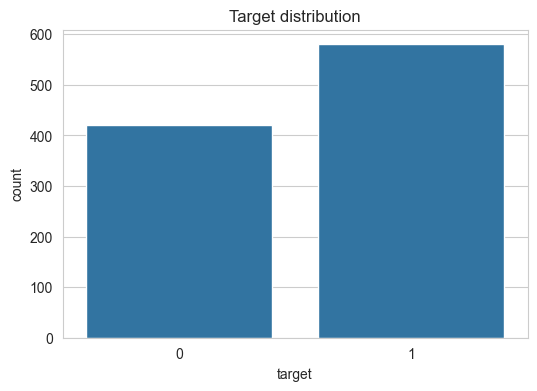

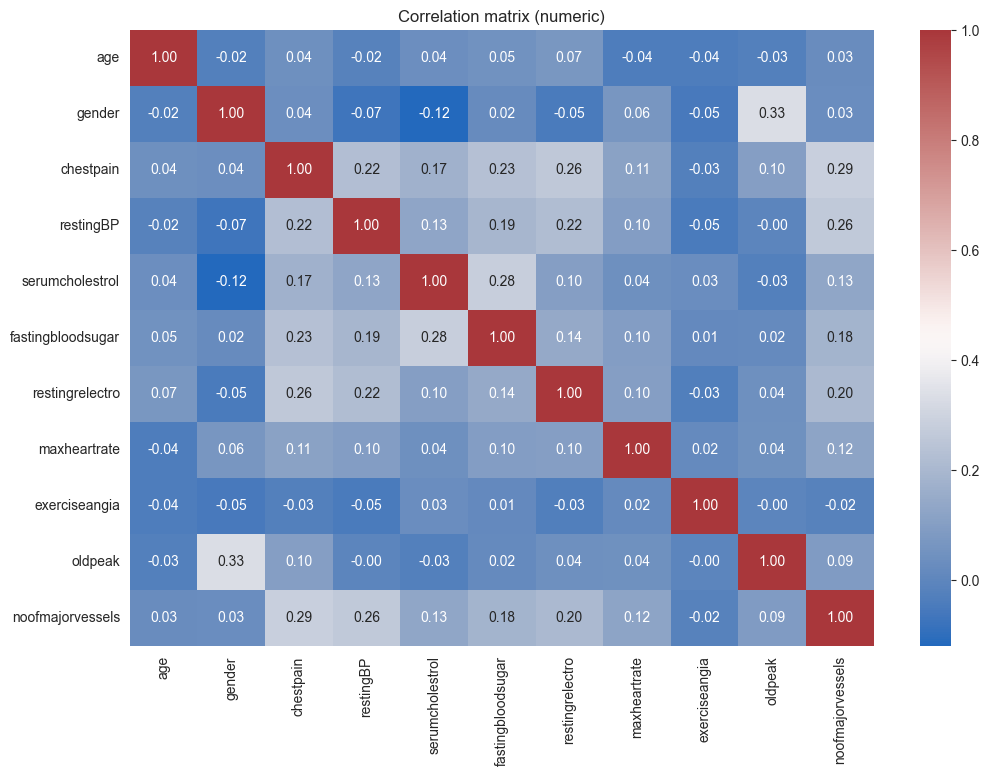

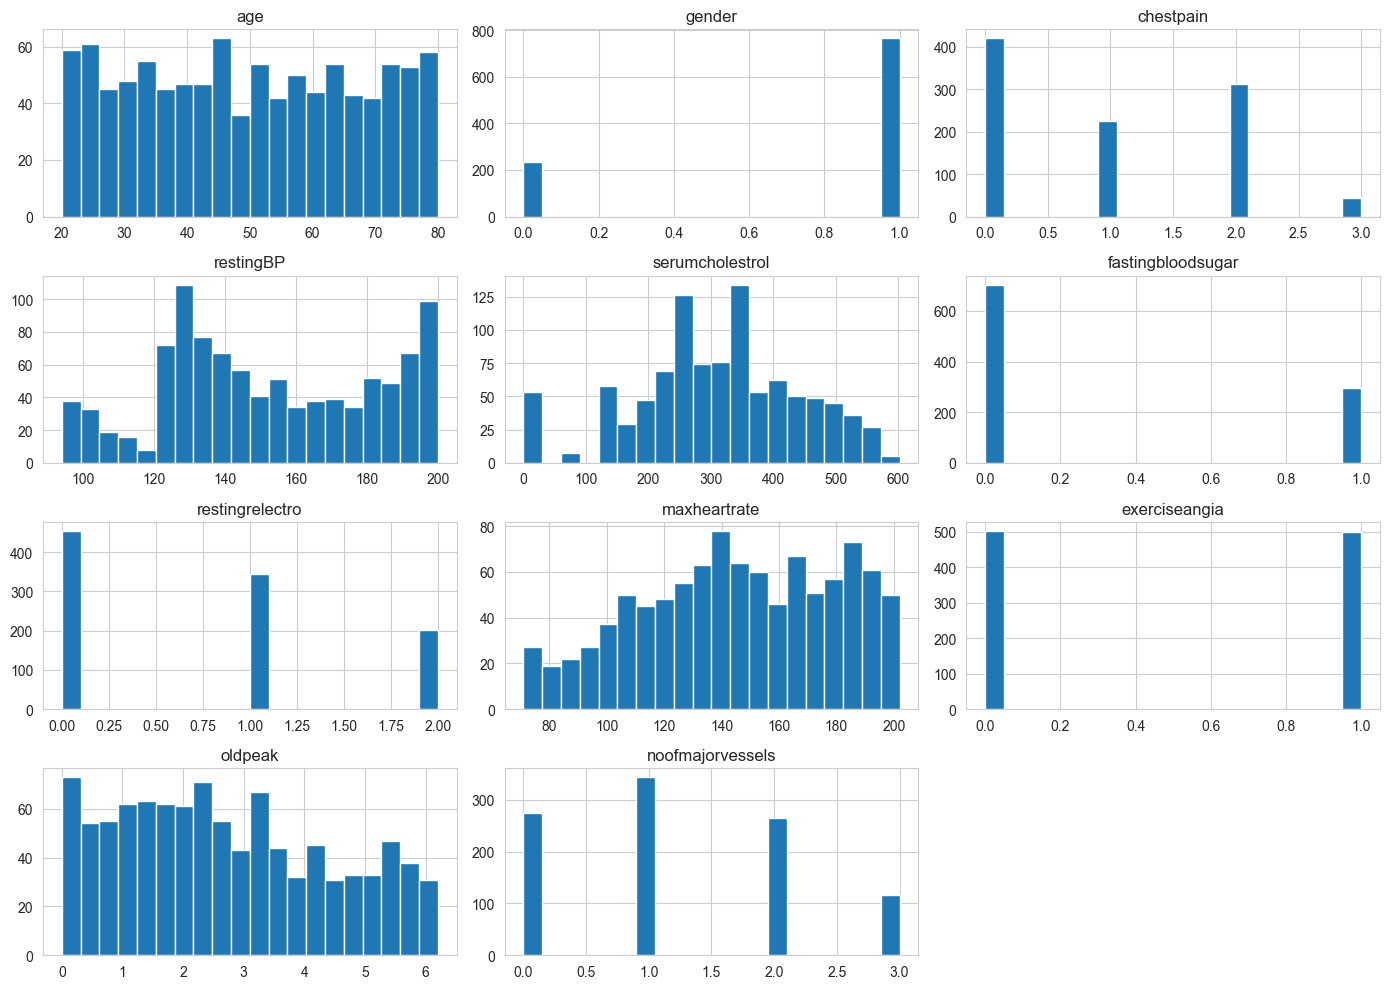

In [5]:
# 5. EDA: target distribution, correlations, distributions
if not data.empty:
    df = df.copy()
    if 'target' in df.columns:
        print('Target value counts:')
        display(df['target'].value_counts(dropna=False))
        plt.figure(figsize=(6,4))
        sns.countplot(x='target', data=df)
        plt.title('Target distribution')
        plt.show()

    # Correlation heatmap for numeric columns
    num = df.select_dtypes(include=[np.number])
    if not num.empty:
        plt.figure(figsize=(12,8))
        sns.heatmap(num.corr(), annot=True, fmt='.2f', cmap='vlag')
        plt.title('Correlation matrix (numeric)')
        plt.show()

    # Histograms for numeric features
    num.hist(bins=20, figsize=(14,10), layout=(int(np.ceil(len(num.columns)/3)),3))
    plt.tight_layout()
    plt.show()
else:
    print('No data')

In [6]:
# 6. Feature engineering (examples)
# Create example features if columns exist. Remove or adapt as needed.
if not data.empty:
    df = df.copy()
    # Example: BMI category if 'bmi' exists
    if 'bmi' in df.columns:
        df['bmi_cat'] = pd.cut(df['bmi'], bins=[0,18.5,25,30,100], labels=['under','normal','over','obese'])
        df['bmi_cat'] = df['bmi_cat'].astype('category')

    # Example: age groups if 'age' exists (age in years or days?)
    if 'age' in df.columns:
        # if age is in days (common in some heart datasets), convert to years
        if df['age'].median() > 200: # heuristic
            df['age_years'] = (df['age'] / 365).round().astype(int)
        else:
            df['age_years'] = df['age']
        df['age_group'] = pd.cut(df['age_years'], bins=[0,30,45,60,100], labels=['<30','30-44','45-59','60+'])
        df['age_group'] = df['age_group'].astype('category')

    display(df.head())
else:
    print('No data')

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,age_years,age_group
0,53,1,2,171,0,0,1,147,0,5.3,3,3,1,53,45-59
1,40,1,0,94,229,0,1,115,0,3.7,1,1,0,40,30-44
2,49,1,2,133,142,0,0,202,1,5.0,1,0,0,49,45-59
3,43,1,0,138,295,1,1,153,0,3.2,2,2,1,43,30-44
4,31,1,1,199,0,0,2,136,0,5.3,3,2,1,31,30-44


In [7]:
# 7. Preprocessing: ColumnTransformer + Pipelines
if not data.empty:
    df = df.copy()
    X = df.drop('target', axis=1)
    y = df['target'].astype(int) if 'target' in df.columns else pd.Series([], dtype=int)

    # Identify numeric & categorical columns
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
    categorical_features = X.select_dtypes(include=['category','object']).columns.tolist()
    print('Numeric features:', numeric_features)
    print('Categorical features:', categorical_features)

    # Pipelines
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    print('Preprocessor created')
else:
    print('No data')

Numeric features: ['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'noofmajorvessels', 'age_years']
Categorical features: ['slope', 'age_group']
Preprocessor created


In [8]:
# 8. Train-test split (single split reused for all models)
if not data.empty:
    X = df.drop('target', axis=1)
    y = df['target'].astype(int)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    print('Train/Test shapes:', X_train.shape, X_test.shape)
else:
    print('No data')

Train/Test shapes: (800, 14) (200, 14)


In [9]:
# 9. Model training and hyperparameter tuning
if not data.empty:
    results = []
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # 9.1 KNN with GridSearch
    pipe_knn = Pipeline(steps=[('pre', preprocessor), ('clf', KNeighborsClassifier())])
    param_knn = {'clf__n_neighbors': list(range(1,31)), 'clf__weights': ['uniform','distance']}
    gs_knn = GridSearchCV(pipe_knn, param_knn, cv=cv, scoring='roc_auc', n_jobs=-1)
    gs_knn.fit(X_train, y_train)
    best_knn = gs_knn.best_estimator_
    print('KNN best params:', gs_knn.best_params_)

    # 9.2 Logistic Regression
    pipe_lr = Pipeline(steps=[('pre', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
    param_lr = {'clf__C': [0.01, 0.1, 1, 10, 100], 'clf__penalty': ['l2']}
    gs_lr = GridSearchCV(pipe_lr, param_lr, cv=cv, scoring='roc_auc', n_jobs=-1)
    gs_lr.fit(X_train, y_train)
    best_lr = gs_lr.best_estimator_
    print('LR best params:', gs_lr.best_params_)

    # 9.3 Decision Tree
    pipe_dt = Pipeline(steps=[('pre', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))])
    param_dt = {'clf__max_depth': [3,5,7,10,None], 'clf__min_samples_leaf': [1,2,5,10]}
    gs_dt = GridSearchCV(pipe_dt, param_dt, cv=cv, scoring='roc_auc', n_jobs=-1)
    gs_dt.fit(X_train, y_train)
    best_dt = gs_dt.best_estimator_
    print('DT best params:', gs_dt.best_params_)

    # 9.4 SVC (probability=True for ROC-AUC)
    pipe_svc = Pipeline(steps=[('pre', preprocessor), ('clf', SVC(probability=True))])
    param_svc = {'clf__C': [0.1,1,10], 'clf__kernel': ['rbf','linear']}
    gs_svc = GridSearchCV(pipe_svc, param_svc, cv=cv, scoring='roc_auc', n_jobs=-1)
    gs_svc.fit(X_train, y_train)
    best_svc = gs_svc.best_estimator_
    print('SVC best params:', gs_svc.best_params_)

    # Collect best models
    best_models = {
        'KNN': best_knn,
        'LogisticRegression': best_lr,
        'DecisionTree': best_dt,
        'SVC': best_svc
    }
else:
    print('No data')

KNN best params: {'clf__n_neighbors': 13, 'clf__weights': 'distance'}
LR best params: {'clf__C': 100, 'clf__penalty': 'l2'}
DT best params: {'clf__max_depth': 5, 'clf__min_samples_leaf': 5}
SVC best params: {'clf__C': 10, 'clf__kernel': 'rbf'}



Model: KNN
Accuracy: 0.895
Precision: 0.905982905982906
Recall: 0.9137931034482759
F1: 0.9098712446351931
ROC-AUC: 0.9719827586206896

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87        84
           1       0.91      0.91      0.91       116

    accuracy                           0.90       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.90      0.89       200



,Pred0,Pred1
Actual0,73,11
Actual1,10,106


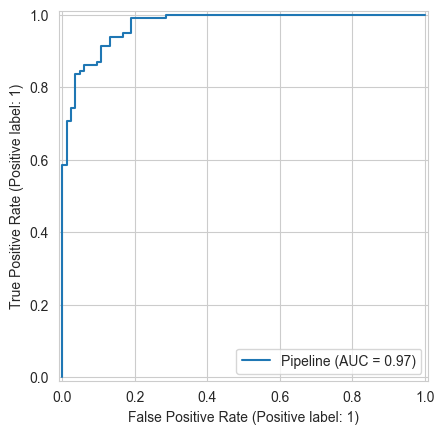


Model: LogisticRegression
Accuracy: 0.985
Precision: 0.9829059829059829
Recall: 0.9913793103448276
F1: 0.9871244635193133
ROC-AUC: 0.9982553366174055

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        84
           1       0.98      0.99      0.99       116

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



,Pred0,Pred1
Actual0,82,2
Actual1,1,115


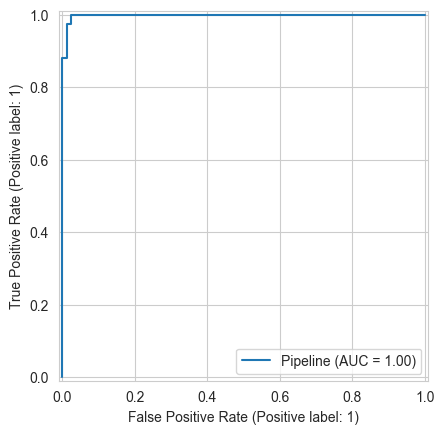


Model: DecisionTree
Accuracy: 0.965
Precision: 0.9504132231404959
Recall: 0.9913793103448276
F1: 0.9704641350210971
ROC-AUC: 0.9915845648604269

Classification report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96        84
           1       0.95      0.99      0.97       116

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



,Pred0,Pred1
Actual0,78,6
Actual1,1,115


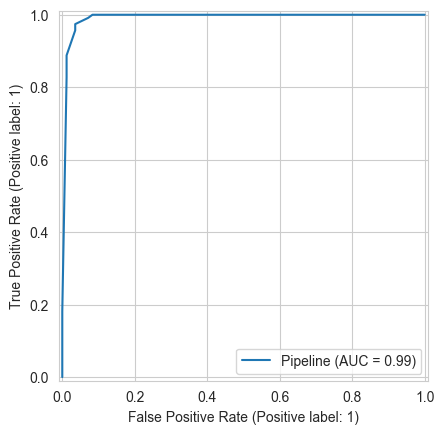


Model: SVC
Accuracy: 0.96
Precision: 0.9576271186440678
Recall: 0.9741379310344828
F1: 0.9658119658119658
ROC-AUC: 0.9944581280788177

Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        84
           1       0.96      0.97      0.97       116

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



,Pred0,Pred1
Actual0,79,5
Actual1,3,113


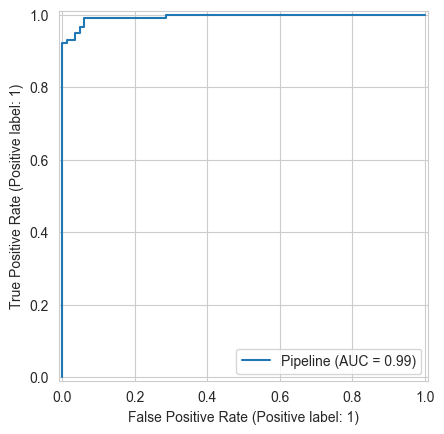

,model,accuracy,precision,recall,f1,roc_auc
1,LogisticRegression,0.985,0.982906,0.991379,0.987124,0.998255
3,SVC,0.960,0.957627,0.974138,0.965812,0.994458
2,DecisionTree,0.965,0.950413,0.991379,0.970464,0.991585
0,KNN,0.895,0.905983,0.913793,0.909871,0.971983


In [10]:
# 10. Evaluation: compute metrics for each best model
if not data.empty:
    eval_rows = []
    for name, model in best_models.items():
        y_pred = model.predict(X_test)
        # get probabilities or decision function for ROC-AUC
        try:
            y_proba = model.predict_proba(X_test)[:,1]
        except Exception:
            try:
                y_proba = model.decision_function(X_test)
            except Exception:
                y_proba = np.zeros_like(y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc = roc_auc_score(y_test, y_proba) if len(np.unique(y_proba))>1 else np.nan
        eval_rows.append((name, acc, prec, rec, f1, roc))
        print('\nModel:', name)
        print('Accuracy:', acc)
        print('Precision:', prec)
        print('Recall:', rec)
        print('F1:', f1)
        print('ROC-AUC:', roc)
        print('\nClassification report:')
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        display(pd.DataFrame(cm, index=['Actual0','Actual1'], columns=['Pred0','Pred1']))
        try:
            RocCurveDisplay.from_estimator(model, X_test, y_test)
            plt.show()
        except Exception as e:
            print('Could not plot ROC curve for', name, e)

    results_df = pd.DataFrame(eval_rows, columns=['model','accuracy','precision','recall','f1','roc_auc'])
    display(results_df.sort_values('roc_auc', ascending=False))
else:
    print('No data')

chestpain            0.381633
restingBP            0.207311
slope_0              0.177843
slope_1              0.107156
oldpeak              0.042891
slope_3              0.031086
gender               0.024358
slope_2              0.021443
serumcholestrol      0.004441
maxheartrate         0.001046
age_years            0.000792
age                  0.000000
noofmajorvessels     0.000000
exerciseangia        0.000000
fastingbloodsugar    0.000000
restingrelectro      0.000000
age_group_30-44      0.000000
age_group_45-59      0.000000
age_group_60+        0.000000
age_group_<30        0.000000
dtype: float64

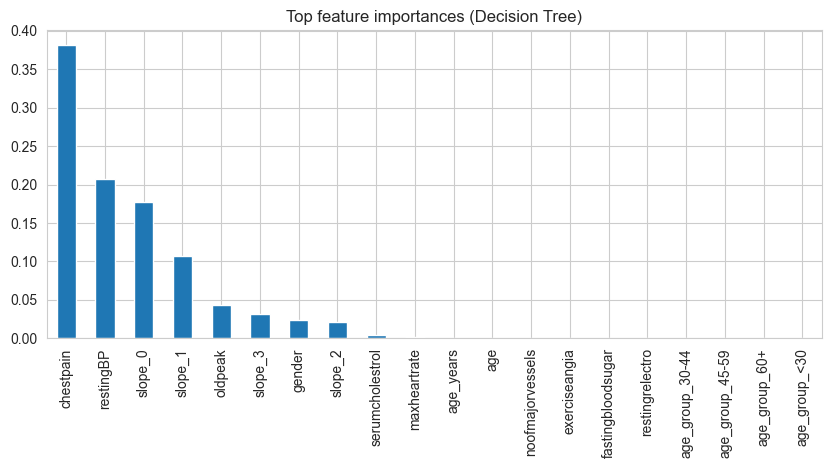

slope_0             -9.388437
slope_3              8.100344
slope_2              4.296997
slope_1             -2.552657
oldpeak             -1.964861
age_group_<30       -1.750449
age_group_60+        1.690354
gender               1.261925
restingBP            1.039922
chestpain            1.024117
age_group_45-59      0.971395
restingrelectro      0.883378
age                 -0.683808
age_years           -0.683808
fastingbloodsugar    0.530254
maxheartrate         0.474867
age_group_30-44     -0.455052
exerciseangia       -0.073847
noofmajorvessels     0.037168
serumcholestrol     -0.013723
dtype: float64

In [11]:
# 11. Feature importance and interpretation
if not data.empty:
    # For Decision Tree
    if 'DecisionTree' in best_models:
        dt = best_models['DecisionTree']
        pre = dt.named_steps['pre']
        num_feats = pre.transformers_[0][2]
        ohe_pipe = pre.transformers_[1][1]
        cat_feats = pre.transformers_[1][2]
        try:
            ohe = ohe_pipe.named_steps['onehot']
            cat_names = list(ohe.get_feature_names_out(cat_feats))
        except Exception:
            cat_names = []
        feat_names = list(num_feats) + list(cat_names)
        try:
            importances = dt.named_steps['clf'].feature_importances_
            fi = pd.Series(importances, index=feat_names).sort_values(ascending=False).head(20)
            display(fi)
            fi.plot(kind='bar', figsize=(10,4))
            plt.title('Top feature importances (Decision Tree)')
            plt.show()
        except Exception as e:
            print('Could not extract feature importances:', e)

    # For Logistic Regression coefficients
    if 'LogisticRegression' in best_models:
        lr = best_models['LogisticRegression']
        pre = lr.named_steps['pre']
        num_feats = pre.transformers_[0][2]
        ohe_pipe = pre.transformers_[1][1]
        cat_feats = pre.transformers_[1][2]
        try:
            ohe = ohe_pipe.named_steps['onehot']
            cat_names = list(ohe.get_feature_names_out(cat_feats))
        except Exception:
            cat_names = []
        feat_names = list(num_feats) + list(cat_names)
        try:
            coefs = lr.named_steps['clf'].coef_[0]
            coef_df = pd.Series(coefs, index=feat_names).sort_values(key=abs, ascending=False).head(20)
            display(coef_df)
        except Exception as e:
            print('Could not extract coefficients:', e)
else:
    print('No data')

## 12. Conclusions & next steps

- This notebook provides a reproducible pipeline for preprocessing, model selection, tuning, and evaluation.
- Review feature engineering and adjust features based on domain knowledge.
- Consider additional models (RandomForest, XGBoost, LightGBM) and more extensive hyperparameter tuning.
- Use SHAP or permutation importance for deeper interpretability.
- If dataset is imbalanced, experiment with class weighting or resampling (SMOTE).

**Next steps I can do on request:**
- Add RandomForest/XGBoost with tuned hyperparameters and SHAP explanations.
- Create an exportable model (pickle) and a short report with plots embedded.
